In [149]:
import numpy as np
import cv2
from numpy.fft import rfft, rfftfreq, irfft
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
signals_1 = []
signals_2 = []
signals_3 = []

file = open("train_set.txt")
readed = file.read().split('\n\n')

for sig in readed:
    sig = sig.split('\n')
    dick = {'1' : signals_1, '2' : signals_2, '3' : signals_3}
    chanels = [np.array(sig[1].split(), dtype='int16'), np.array(sig[2].split(), dtype='int16')]
    dick[sig[0]].append(chanels)

In [1357]:
def getX(sig):
    N = sig.size
    return rfftfreq(N, 1 / 256)

def getY(sig):
    yf = rfft(sig)
    return np.abs(yf)

def getFilterFurie(sig):
    x = getX(sig)
    sig = getY(sig)
#     sig[int(45/x[1]):int(70/x[1])] = 200
    return sig

def getFilterSignal(sig):
    sig = getFilterFurie(sig)
    return irfft(sig)[10:-10]

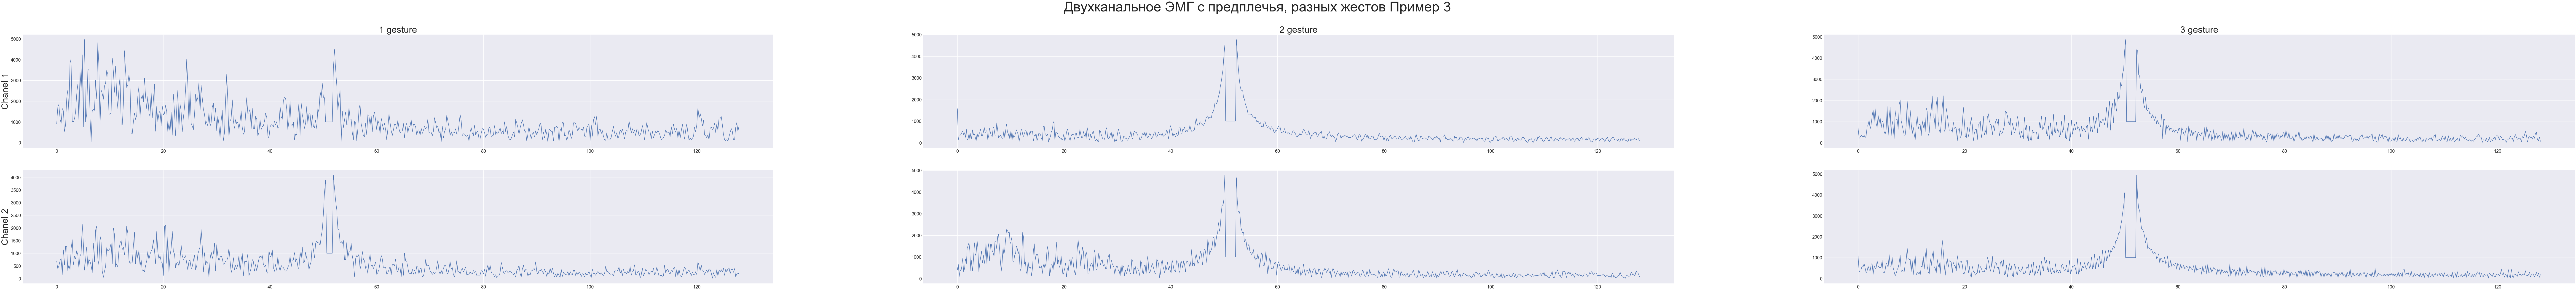

In [20]:
n = 2

pop = 3

fig, axes = plt.subplots(n, 3, figsize=(200, 20))

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=20)

fig.suptitle("Двухканальное ЭМГ с предплечья, разных жестов Пример " + str(pop), fontsize=60)
    
axes[0, 0].set_title('1 gesture', fontsize=40)
axes[0, 1].set_title('2 gesture', fontsize=40)
axes[0, 2].set_title('3 gesture', fontsize=40)
axes[0, 0].set_ylabel('Chanel 1', fontsize=40)
axes[1, 0].set_ylabel('Chanel 2', fontsize=40)

handler = getFilterFurie

for i in range(0, n, 2): # range(n)
    const = pop - 1
    # 1
    sig1 = signals_1[const][0]
    sig2 = signals_1[const][1]
    
    axes[0, 0].plot(getX(sig1), handler(sig1))
    axes[1, 0].plot(getX(sig2), handler(sig2))
    
    # 2
    sig1 = signals_2[const][0]
    sig2 = signals_2[const][1]
    axes[0, 1].plot(getX(sig1), handler(sig1))
    axes[1, 1].plot(getX(sig2), handler(sig2))
    
    # 3
    sig1 = signals_3[const][0]
    sig2 = signals_3[const][1]
    
    axes[0, 2].plot(getX(sig1), handler(sig1))
    axes[1, 2].plot(getX(sig2), handler(sig2))

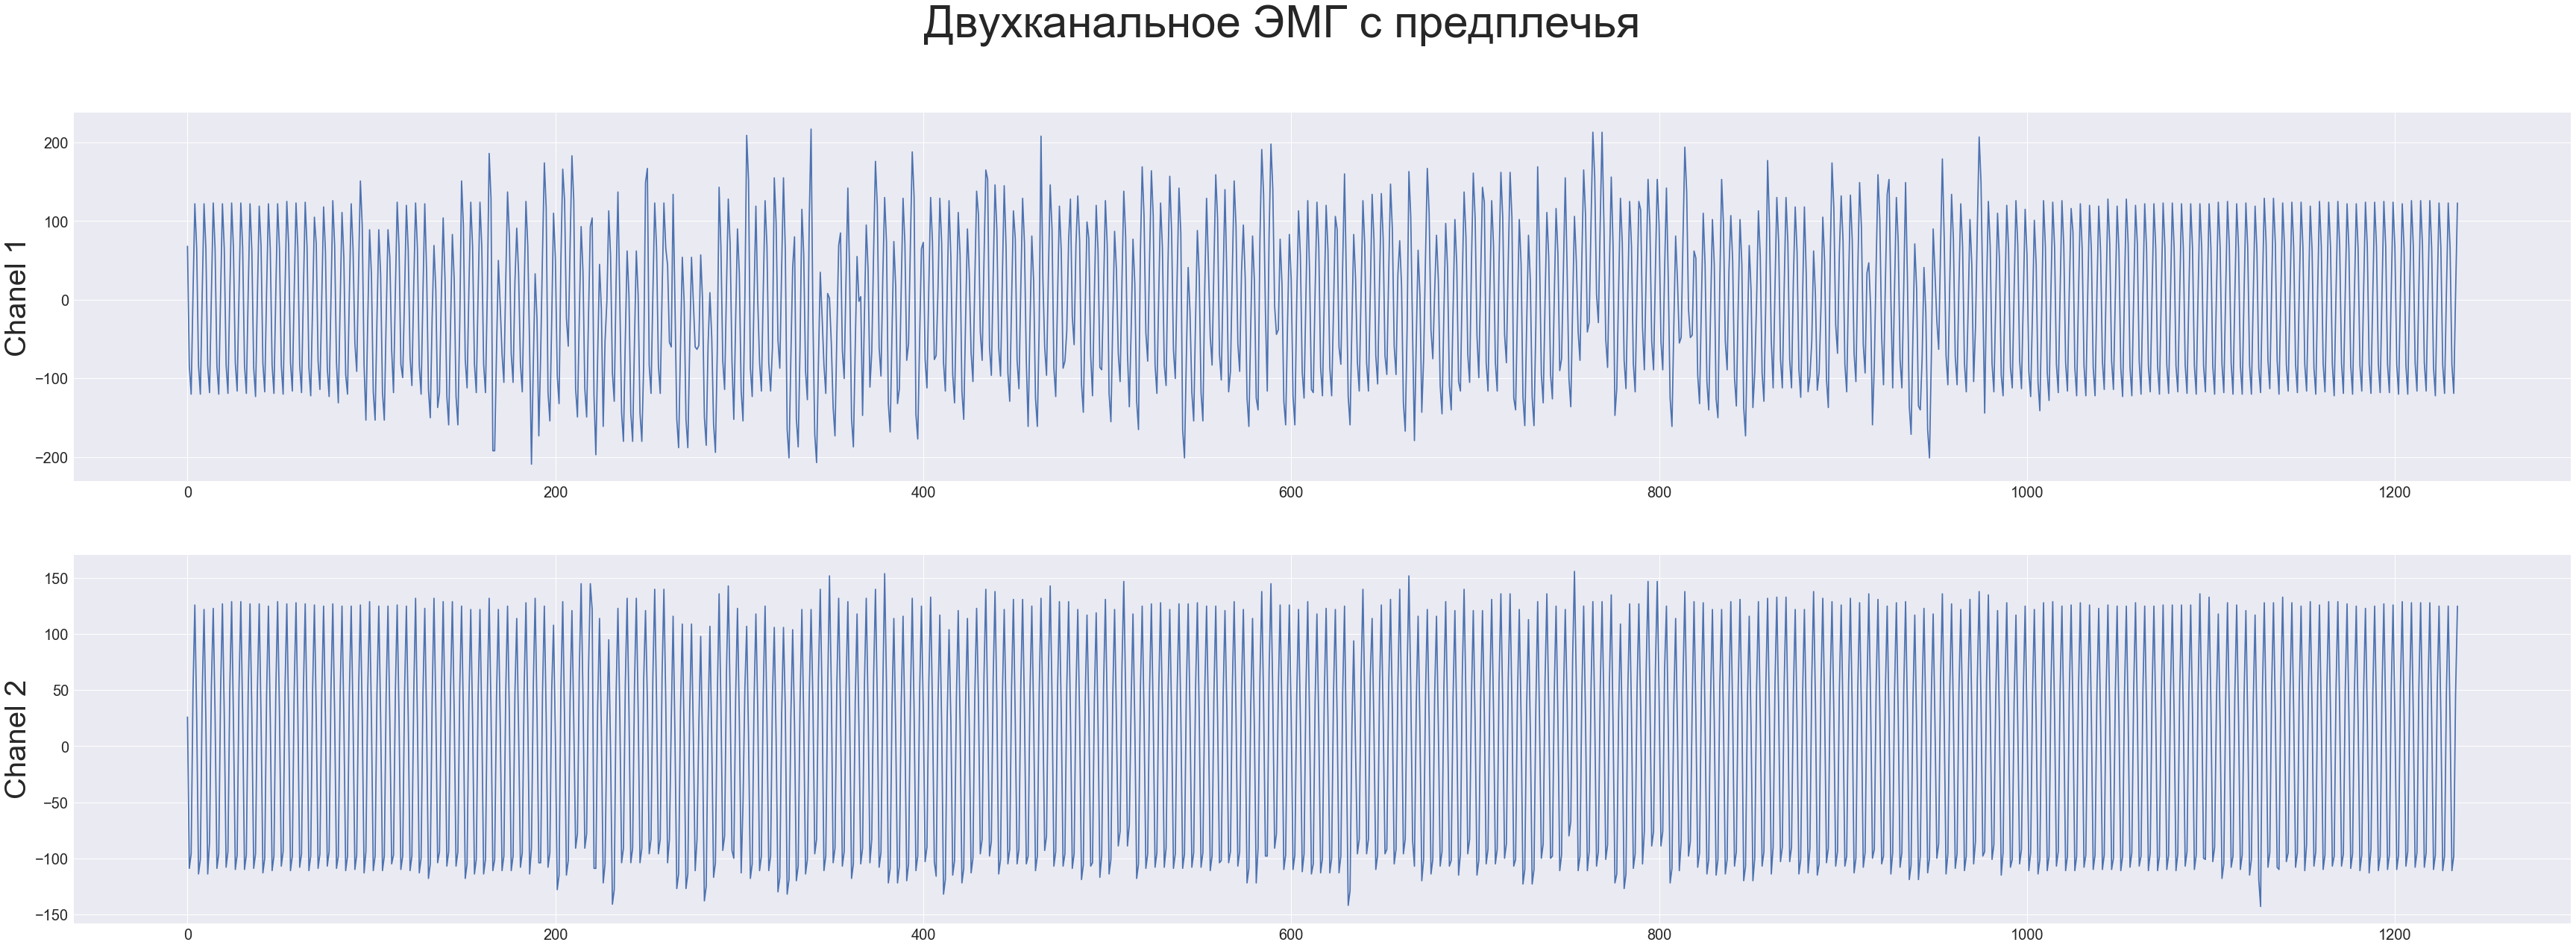

In [483]:
fig, axes = plt.subplots(2, figsize=(60, 20))

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=20)

fig.suptitle("Двухканальное ЭМГ с предплечья", fontsize=60)

axes[0].set_ylabel('Chanel 1', fontsize=40)
axes[1].set_ylabel('Chanel 2', fontsize=40)

# handler = lambda sig: cv2.resize(getFilterFurie(sig), (1, 200))
# handler = lambda sig: np.resize(getFilterFurie(sig), (200))
handler = lambda sig: getFilterFurie(sig)
# cv2.resize(sig, (100), interpolation = cv2.INTER_AREA)

exampNum = 0
gestures = signals_3

# 1
ch1 = gestures[exampNum][0]
ch2 = gestures[exampNum][1]

axes[0].plot(handler(ch1))
axes[1].plot(handler(ch2))

In [1358]:
def getFeatures(signals):
    s = 500
    handler = lambda sig: cv2.resize(getSpector(sig, 20).flatten(), (1, s))
#     handler = lambda sig: cv2.resize(getFilterFurie(sig), (1, s))
    ch1 = handler(signals[0])
    ch2 = handler(signals[1])
    
    features = np.concatenate([ch1, ch2])

    return features

x = np.array(list(map(getFeatures, signals_1)) + list(map(getFeatures, signals_2)) + list(map(getFeatures, signals_3)))

a = np.full(29, 0)
b = np.full(29, 1)
c = np.full(29, 2)
y = np.concatenate([a, b, c])
y = tf.keras.utils.to_categorical(y)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.01, random_state=6)

In [1333]:
# INIT_LR = 0.05
# EPOCHS = 400
# BATCH_SIZE = 1

# def buildmodel():
#     model = Sequential()
#     model.add(Dense(256, input_shape=(1000,), activation="sigmoid"))
#     model.add(Dense(64, activation="sigmoid"))
#     model.add(Dense(8, activation="sigmoid"))
#     model.add(Dense(3, activation="softmax"))
#     model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=INIT_LR), metrics=["accuracy"])
    
#     return model

# save_dir = r"C:\Users\Admin\PycharmProjects\Kognitive NTI\Module 2\Task 1\saved_models\\"

# def get_model_name():
#     return save_dir + r'model_{val_acc:.2f}.h5'
    
# model = buildmodel()
# checkpoint = ModelCheckpoint(get_model_name(), monitor='val_acc', verbose=0, 
#                              save_best_only=True, mode='max')
# H = model.fit(train_x, train_y, validation_data=(test_x, test_y), 
#               epochs=EPOCHS, callbacks=[checkpoint])

# H = H.history

# model.save(save_dir + r'model_best.h5')

# plt.figure(figsize=(20, 10))
# plt.plot(H['acc'], label='train accuracy')
# plt.plot(H['val_acc'], label='val accuracy')
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend()

# print("\nAccuracy: ", max(H['val_acc']))

# len(train_x[])

1160

4

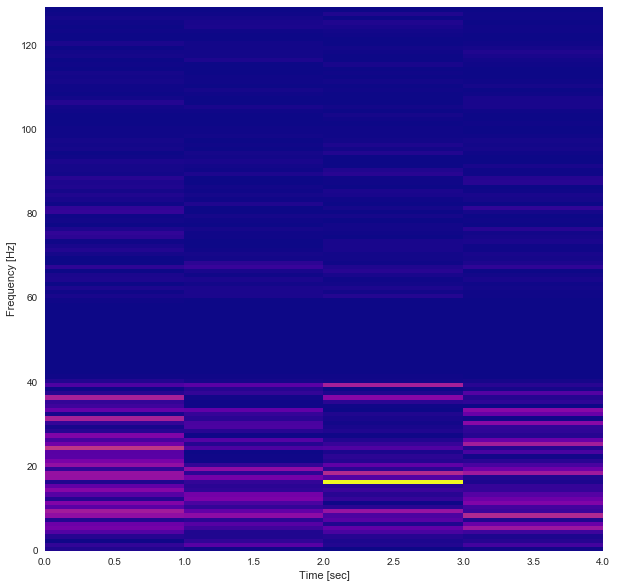

In [717]:
from scipy import signal
from scipy.fft import fftshift

sig = getFilterSignal(signals_1[8][1])

plt.figure(figsize=(10, 10))

f, t, Sxx = signal.spectrogram(sig, 250)
plt.pcolormesh(Sxx, cmap='plasma')
# plt.plot(getY(sig))

plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

len(Sxx[0])

516

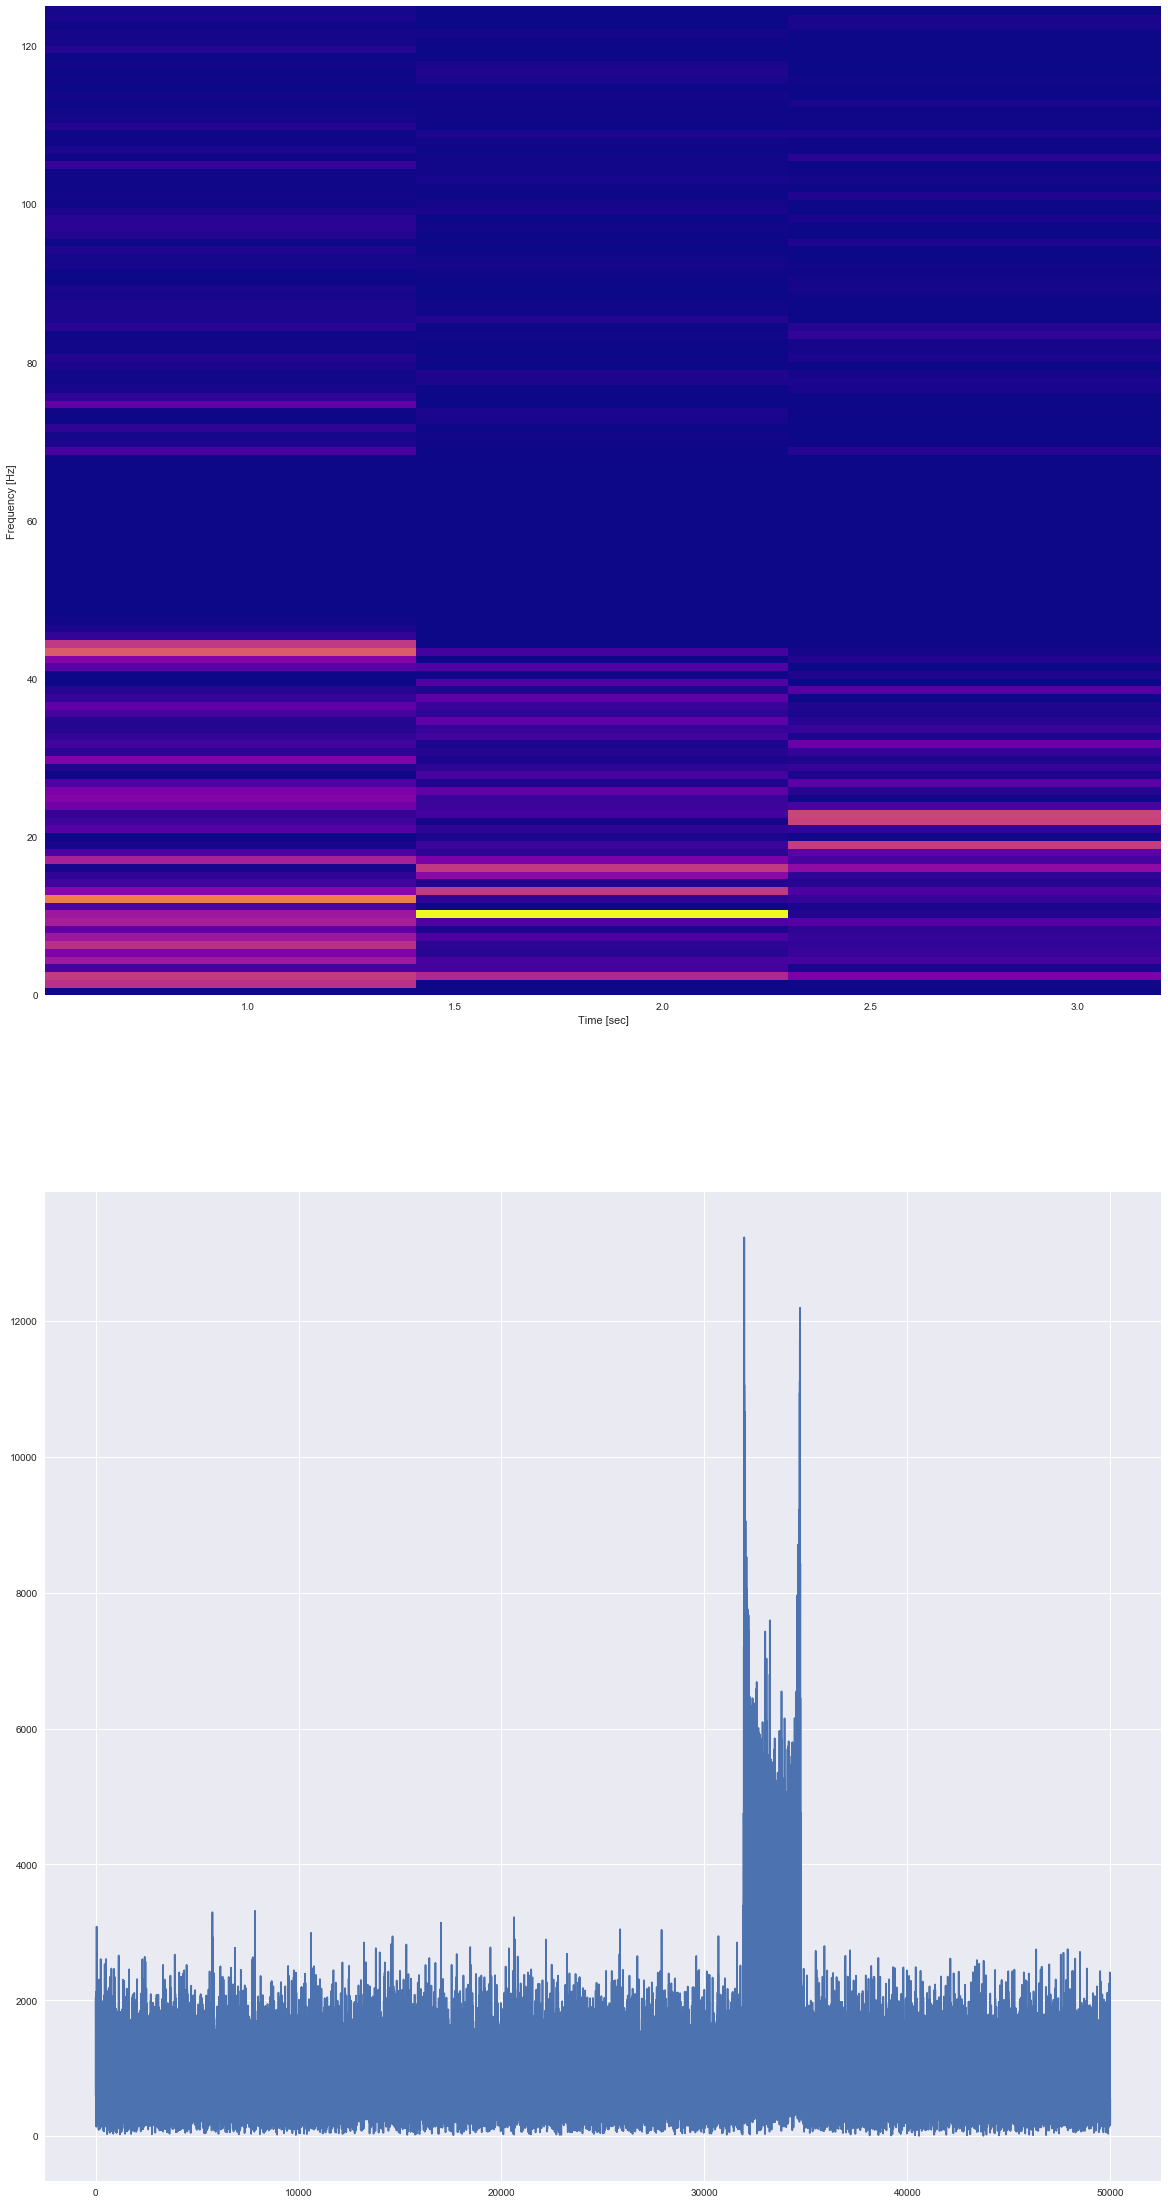

In [1355]:
fs = 9000
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

_, axes = plt.subplots(2, figsize=(20, 40))

sig = getFilterSignal(signals_1[6][0])

f, t, Sxx = signal.spectrogram(sig, 250)
axes[0].pcolormesh(t, f, Sxx, cmap='plasma')
axes[0].set_ylabel('Frequency [Hz]')
axes[0].set_xlabel('Time [sec]')

axes[1].plot(getY(x))

Sxx.size

540

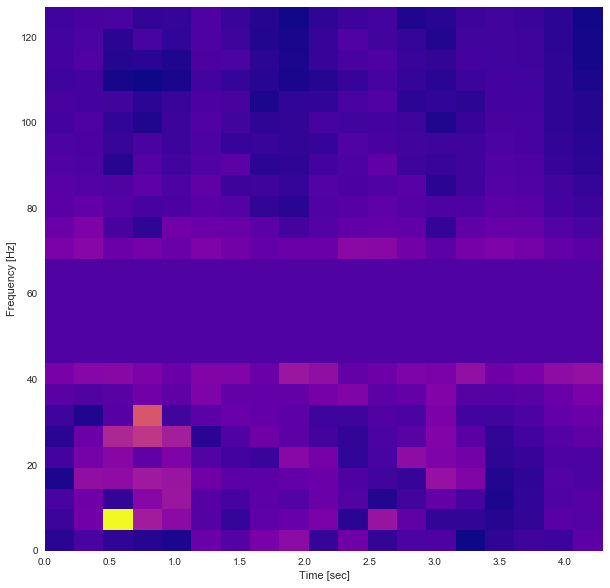

In [1348]:
def getSpector(sig, n):
    out = []
    
    butch = len(sig) // n
    
    for i in range(0, len(sig), butch):
        out.append(getFilterFurie(sig[i:i+butch]))
    
    out = np.array(out[:-1])
    out = out.transpose()
    
    return out

sig = signals_1[8][0]

plt.figure(figsize=(10, 10))
spectr = getSpector(sig, 20)
freqs = np.linspace(0, 127, spectr.shape[0])
time = np.linspace(0, sig.size / 250, spectr.shape[1])

plt.pcolormesh(time, freqs, spectr, cmap='plasma')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

spectr.size

In [245]:
model = load_model(r'C:\Users\Admin\PycharmProjects\Kognitive NTI\Module 2\Task 1\model_best.h5')

data = []
file = open("val_set.txt")
    
for sig in file.read().split('\n\n'):
    sig = sig.split('\n')
    dick = {'1' : signals_1, '2' : signals_2, '3' : signals_3}
    chanels = [np.array(sig[0].split(), dtype='int16'), np.array(sig[1].split(), dtype='int16')]
    data.append(chanels)
file.close()
    
data = np.array(list(map(getFeatures, data)))

pred = model.predict(data)
pred = np.array(list(map(lambda p: 1 if p[0] > p[1] else 2, pred)))

print(' '.join(list(map(str, pred))))

1 1 2 2 1 2 1 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 2 1 1 2 2 2 1 2 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1
